In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [100]:
load_path = 'D:\EECE499\Features\\'
#load_path = '..\..\\'

In [101]:
Features = pd.read_excel(load_path + 'Features.xlsx')

In [102]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

# Arousal

In [103]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [105]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [106]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
y_pred = classifier.predict(X_test)

In [108]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [109]:
confusion_mtrx

array([[ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  9,  2,  0],
       [ 0,  0,  0,  0, 17,  3,  0],
       [ 0,  0,  0,  1, 39,  6,  0],
       [ 0,  0,  0,  0, 68,  6,  0],
       [ 0,  0,  0,  2, 36,  6,  0],
       [ 0,  0,  0,  0, 11,  5,  0]], dtype=int64)

In [110]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [111]:
print(accuracy, mae, rmse)

0.352112676056338 0.9859154929577465 1.8873239436619718


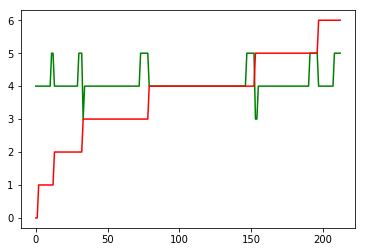

In [112]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

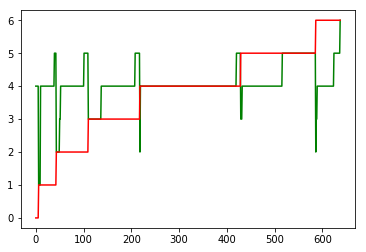

In [113]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [114]:
classifier = SVC()

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
kernels = ['sigmoid', 'rbf']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}

grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=StratifiedKFold(2), verbose=1,\
                           scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   18.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel': ['sigmoid', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [115]:
grid_search.best_params_

{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'sigmoid'}

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [117]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [119]:
print(accuracy, mae, rmse)

0.3474178403755869 0.9530516431924883 1.7136150234741785


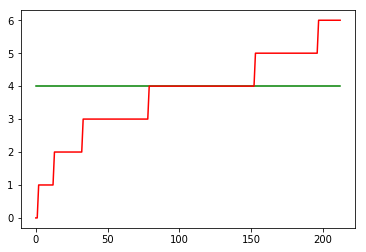

In [120]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Engaging

In [121]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -4].values

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [123]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [124]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
y_pred = classifier.predict(X_test)

In [126]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [127]:
confusion_mtrx

array([[ 0,  0, 16,  0,  4,  1,  0],
       [ 0,  1, 12,  2,  2,  4,  0],
       [ 0,  1, 31,  3,  0,  8,  0],
       [ 0,  3, 17,  2,  3, 10,  0],
       [ 0,  0, 27,  1,  2,  4,  0],
       [ 0,  2, 28,  2,  1,  5,  0],
       [ 0,  0, 17,  0,  1,  3,  0]], dtype=int64)

In [128]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [129]:
print(accuracy, mae, rmse)

0.19248826291079812 1.8497652582159625 5.107981220657277


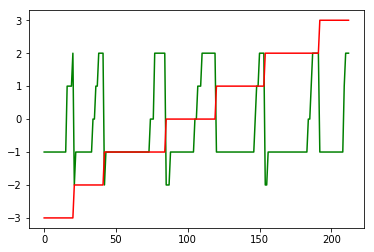

In [130]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

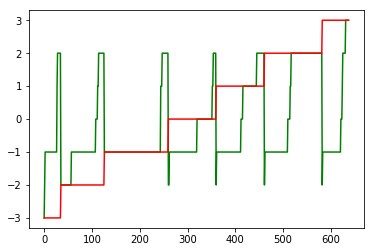

In [131]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [132]:
classifier = SVC()

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
kernels = ['sigmoid', 'rbf']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}

grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=StratifiedKFold(2), verbose=1,\
                           scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   18.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel': ['sigmoid', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [133]:
grid_search.best_params_

{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'sigmoid'}

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [135]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [136]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [137]:
print(accuracy, mae, rmse)

0.20187793427230047 1.7089201877934272 4.47887323943662


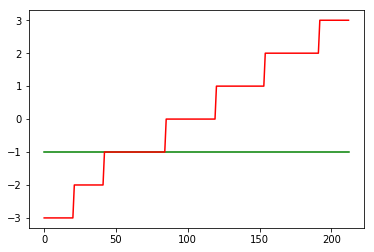

In [138]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Familiarity

In [139]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -3].values

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [141]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [142]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
y_pred = classifier.predict(X_test)

In [144]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [145]:
confusion_mtrx

array([[ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  2, 10,  0],
       [ 0,  0,  0,  9, 59,  1],
       [ 0,  0,  0,  1, 84,  1],
       [ 0,  0,  0,  4, 35,  1]], dtype=int64)

In [146]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [147]:
print(accuracy, mae, rmse)

0.4413145539906103 0.6995305164319249 1.0938967136150235


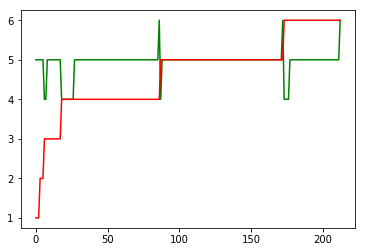

In [148]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

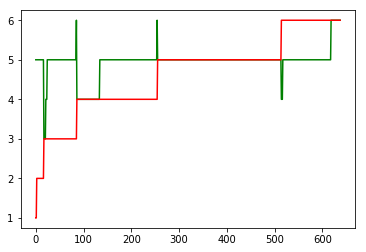

In [149]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [150]:
classifier = SVC()

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
kernels = ['sigmoid', 'rbf']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}

grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=StratifiedKFold(2), verbose=1,\
                           scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   17.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel': ['sigmoid', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [151]:
grid_search.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [153]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [155]:
print(accuracy, mae, rmse)

0.40375586854460094 0.7230046948356808 1.0892018779342723


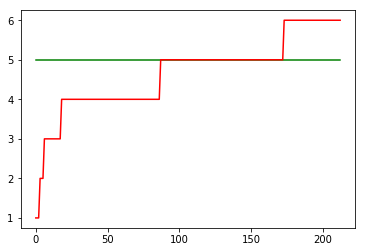

In [156]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Liking

In [157]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -2].values

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [159]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [160]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [161]:
y_pred = classifier.predict(X_test)

In [162]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [163]:
confusion_mtrx

array([[ 0,  0,  0,  3,  0,  6,  0],
       [ 0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  2,  8,  0, 26,  0],
       [ 0,  0,  1,  3,  0, 37,  0],
       [ 0,  0,  1,  4,  1, 26,  0],
       [ 0,  0,  1,  6,  2, 42,  0],
       [ 0,  0,  0,  1,  3, 22,  0]], dtype=int64)

In [164]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [165]:
print(accuracy, mae, rmse)

0.22535211267605634 1.6525821596244132 4.544600938967136


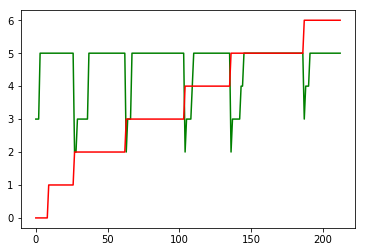

In [166]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

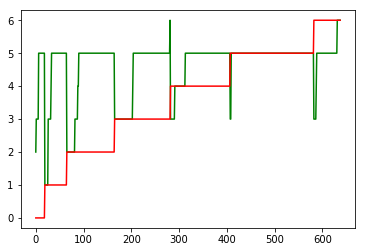

In [167]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [168]:
classifier = SVC()

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
kernels = ['sigmoid', 'rbf']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}

grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=StratifiedKFold(2), verbose=1,\
                           scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   18.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel': ['sigmoid', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [169]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [171]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [172]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [173]:
print(accuracy, mae, rmse)

0.23943661971830985 1.7136150234741785 4.971830985915493


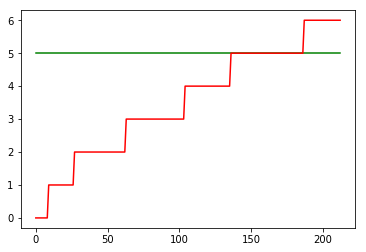

In [174]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

# Valence

In [175]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -1].values

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [177]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [178]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [179]:
y_pred = classifier.predict(X_test)

In [180]:
confusion_mtrx = confusion_matrix(y_test, y_pred)

In [181]:
confusion_mtrx

array([[98,  0,  0,  0,  1],
       [35,  0,  0,  0,  0],
       [21,  0,  0,  0,  1],
       [25,  0,  0,  0,  4],
       [25,  0,  0,  0,  3]], dtype=int64)

In [182]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [183]:
print(accuracy, mae, rmse)

0.47417840375586856 1.2300469483568075 3.6056338028169015


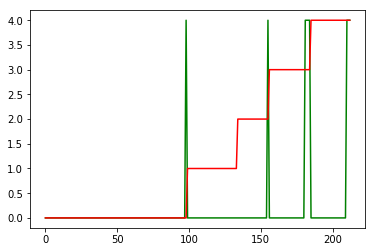

In [184]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')

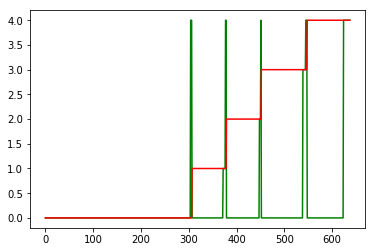

In [185]:
y_pred = classifier.predict(X_train)

y_new = sort_list(y_pred, y_train)

plt.plot(y_new, color='green')
plt.plot(sorted(y_train), color='red')

In [186]:
classifier = SVC()

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
kernels = ['sigmoid', 'rbf']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}

grid_search = GridSearchCV(classifier, param_grid=param_grid, cv=StratifiedKFold(2), verbose=1,\
                           scoring='neg_mean_absolute_error')
grid_search.fit(X, y)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


[Parallel(n_jobs=1)]: Done 168 out of 168 | elapsed:   15.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel': ['sigmoid', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [187]:
grid_search.best_params_

{'C': 0.0001, 'gamma': 0.0001, 'kernel': 'sigmoid'}

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [189]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [190]:
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

In [191]:
print(accuracy, mae, rmse)

0.4647887323943662 1.3051643192488263 3.9061032863849765


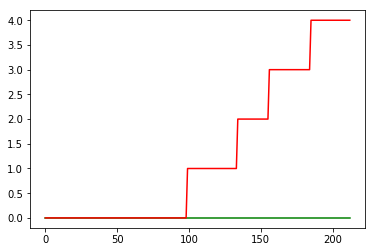

In [192]:
y_new = sort_list(y_pred, y_test)

plt.plot(y_new, color='green')
plt.plot(sorted(y_test), color='red')